**************************************
**************************************
**************************************
**************************************
**************************************


Text(0.5, 1.0, 'Error vs. Training Epoch')

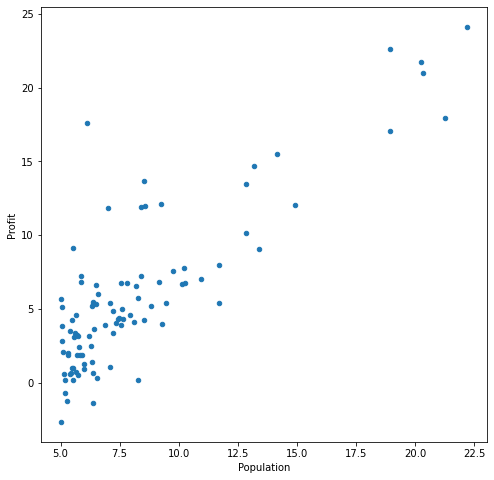

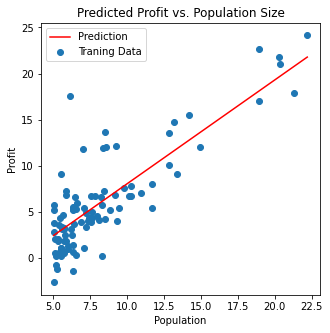

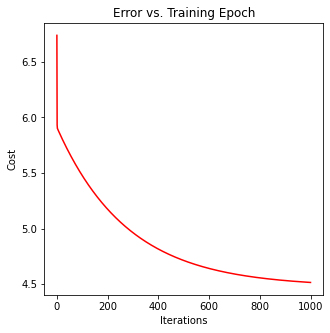

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 19 09:47:18 2022

@author: Taha
"""

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# #read data
path = 'data.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

#show data details
# print('data = \n' ,data.head(10) )
# print('**************************************')
# print('data.describe = \n',data.describe())
# print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,8))

# #=========================================================================

# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
#print('new data = \n' ,data.head(10) )
print('**************************************')


# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

print('**************************************')
#print('X data = \n' ,X.head(10) )
#print('y data = \n' ,y.head(10) )
print('**************************************')



# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

# print('X \n',X)
# print('X.shape = ' , X.shape)
# print('theta \n',theta)
# print('theta.shape = ' , theta.shape)
# print('y \n',y)
# print('y.shape = ' , y.shape)
# print('**************************************')

#=========================================================================
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))

#print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

print('**************************************')


# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))    #[0,0]
    #print("temp " ,temp)
    #print("type of temp is : ",type(temp))
    parameters = int(theta.ravel().shape[1])  # theta.shape = 1*2  so paramete = 2
    #print("parameter = " ,parameters)
    #print("type of parameter is : ",type(parameters))
    cost = np.zeros(iters)                     #[0,0,0,0.....iters-1]    
    #print("type of cost is : ",type(cost))
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

#print('g = ' , g)
#print('cost  = ' , cost[0:50] )
#print('computeCost = ' , computeCost(X, y, g))
print('**************************************')


# #=========================================================================

# # get best fit line

x = np.linspace(data.Population.min(), data.Population.max(), 100)
#print('x \n',x)
#print('g \n',g)

#linear equation = theta0 +theta1*x +theta2*x2 ....
f = g[0, 0] + (g[0, 1] * x)
#print('f \n',f)




# # draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
 

# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')